In [5]:
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import xgboost as xgb
import feature_eng_function as f_eng
from datetime import datetime
from matplotlib import pyplot as plt
from PCA_function import pca_data100
from IPython.core.display import display, HTML
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
forest = pd.read_csv("data/train.csv", index_col=0)
forest_eng = pd.read_csv("data/train_eng.csv", index_col=0)
forest_100 = pd.read_csv("data/train_100.csv", index_col=0)
forest_100_test = pd.read_csv("")

data = forest.values
X_kaggle = data[:,0:(-1)]
y_train = data[:,-1]

data = forest_eng.values
X_base = data[:,0:(-1)]
y_train = data[:,-1]

data = forest_100.values
X_100 = data[:,0:(-1)]
y_train = data[:,-1]

X_train_k, X_val_k, y_train_k, y_val_k = train_test_split(X_kaggle, y_train, test_size=0.2, random_state=0)
X_train_100, X_val_100, y_train_100, y_val_100 = train_test_split(X_100, y_train, test_size=0.2, random_state=0)
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_base, y_train, test_size=0.2, random_state=0)

In [52]:
t1 = datetime.now()
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='log2', min_samples_split=3, random_state=0)
scores = cross_val_score(clf, X_train_100, y_train_100, cv=5, scoring='accuracy')
scores.mean() 
t2 = datetime.now()
print ("Total time: %i sec" %(t2-t1).seconds)
print ("Mean Accuracy: %f" %(scores.mean()))

Total time: 126 sec
Mean Accuracy: 0.865578


In [ ]:
clf.predict(X_test_100)

In [53]:
t1 = datetime.now()
clf_xgb = xgb.XGBClassifier(seed=0,objective='multi:softmax', silent=True)
clf_xgb.fit(X_train_100, y_train_100, eval_metric='merror', eval_set=[(X_train_100, y_train_100),(X_val_100, y_val_100)], verbose=True)
clf_xgb_pred = clf_xgb.predict(X_val_100)
clf_xgb_accuracy = accuracy_score(y_val_100, clf_xgb_pred);
t2 = datetime.now()
print ("Total time: %i sec" %(t2-t1).seconds)
print ('accuracy:%f'%(clf_xgb_accuracy*100))

[0]	validation_0-merror:0.305804	validation_1-merror:0.320106
[1]	validation_0-merror:0.304233	validation_1-merror:0.320106
[2]	validation_0-merror:0.304233	validation_1-merror:0.321759
[3]	validation_0-merror:0.300843	validation_1-merror:0.317791
[4]	validation_0-merror:0.293899	validation_1-merror:0.305556
[5]	validation_0-merror:0.295883	validation_1-merror:0.307209
[6]	validation_0-merror:0.29084	validation_1-merror:0.307209
[7]	validation_0-merror:0.28621	validation_1-merror:0.302249
[8]	validation_0-merror:0.288442	validation_1-merror:0.303241
[9]	validation_0-merror:0.286376	validation_1-merror:0.301587
[10]	validation_0-merror:0.283813	validation_1-merror:0.302579
[11]	validation_0-merror:0.281829	validation_1-merror:0.299272
[12]	validation_0-merror:0.280589	validation_1-merror:0.296958
[13]	validation_0-merror:0.278108	validation_1-merror:0.295966
[14]	validation_0-merror:0.276951	validation_1-merror:0.293981
[15]	validation_0-merror:0.271743	validation_1-merror:0.288029
[16]

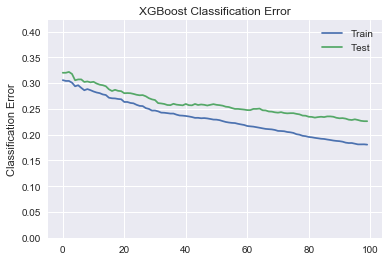

In [54]:
#predictions = [round(value) for value in clf_xgb_pred]
clf_xgb_accuracy = accuracy_score(y_val_100, clf_xgb_pred)
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
y_axis = np.linspace(0,max(max(results['validation_0']['merror']),max(results['validation_1']['merror'])))

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylim(0,max(max(results['validation_0']['merror']),max(results['validation_1']['merror']))+.1)
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig('xgb_training_defaults.png')
plt.show()